In [2]:
%reload_ext jupyter-rdfify

In [3]:
# This cell defines some helpers, imports and strings for tests. Run it!
from rdflib import Variable, URIRef, Literal, XSD
s = "http://example.org/subjects#{}"
p = "http://example.org/properties#{}"
c = "http://example.org/classes#{}"
lab = "http://www.w3.org/2000/01/rdf-schema#label"
err = "Your query gave no result."
def project(bindings, variables):
    result = list()
    for binding in bindings:
        result.append(binding.project(variables))
    return result
def bindingToString(binding):
    res = ""
    for var in binding:
        res += f"{var.n3()} -> {binding[var].n3()}\n"
    return res
def lenCheck(bindings, length, msg=None):
    assert len(bindings) == length, \
        f"Your query returned the wrong number of results. It returned {len(bindings)} but should have returned {length}.\n" \
        + (msg if msg is not None else "")
def exCheck(bindings, binding):
    assert binding in bindings, \
        f"Your result is missing the following binding:\n{bindingToString(binding)}"
def bindCheck(bindings, pos, binding):
    assert(bindings[pos] == binding), \
        f"""The result of your query has the wrong binding in position {pos}.
            Expected binding:\n{bindingToString(binding)}
            Your binding:\n{bindingToString(bindings[pos])}"""
def uri(prefix, name):
    return URIRef(prefix.format(name))

# SPARQL
SPARQL stands for **S**PARQL **P**rotocol **A**nd **R**DF **Q**uery **L**anguage and is a [W3C recommended](https://www.w3.org/TR/sparql11-overview/) language for querying and manipulating RDF graph content. As its syntax is similar Turtle, we will first look at an example:

**PREFIX ex: http://example.org/#<br>   
SELECT ?countryName ?capitalName  
WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;ex:Germany ex:name ?countryName .  
&nbsp;&nbsp;&nbsp;&nbsp;ex:Germany ex:capital ?capital .  
&nbsp;&nbsp;&nbsp;&nbsp;?capital ex:name ?capitalName  
}**

The following information was extracted from the [W3C SPARQL Query Language Specification](https://www.w3.org/TR/2013/REC-sparql11-query-20130321/). If you have any questions regarding SPARQL please first consult this document.

## Prefixes
As in Turtle, we can define *prefixes* to make our query more human-readable. In SPARQL, prefix declarations start with the keyword **PREFIX** and are then followed by the desired abbreviation and then the IRI to abbreviate. This syntax also works in turtle but note that there is *no period* at the end of the line (in contrary to the *@prefix* syntax which only works in Turtle). In the example above, we abbreviate the URI http://example.org/# to *ex:*.


## Queries
After all our prefix declarations, the query starts. First we need to specify a *query type*. SPARQL defines four query types which all match a given graph pattern against an RDF graph but differ in what they return:
- **SELECT:** Queries return the variable bindings of user-specified variables which satisfy the given graph pattern.
- **ASK:** Queries return a boolean result based on whether the given graph pattern could be matched against the RDF graph or not.
- **CONSTRUCT:** Queries return a new graph which is constructed from a template and the variable bindings which satisfy the given graph pattern.
- **DESCRIBE:** Queries return an RDF graph which describes the resource based on what the query service deems important (different query services can yield different results for the same graph).

In our example above, we use a SELECT query. The graph pattern follows after the keyword **WHERE** and is surrounded by braces ({}).
## Basic Graph Patterns
We use so-called **Graph Patterns** to query an RDF graph. *Basic Graph Patterns* look very similar to Turtle as they use the same triple syntax. The only difference is that in Graph Patterns, we can also use variables at every position where an IRI can be used. Variables always start with a question mark and need an identifier. The graph pattern in our example (after the WHERE keyword) features three variables - namely ?countryName, ?capital and ?capitalName - in three triples. When matching a Graph Pattern against an RDF graph, the query service searches for variables bindings such that the Graph Pattern matches a part of the queried graph. When a variable occurs more than once in a pattern, both occurences have to be bound to the same value in a match. Also note that the period at the end of a line represents a conjuction (AND), which is why we the last period of a Graph Pattern is optional. There are also more complex Graph Patterns called Group Graph Patterns, which we will cover later on.

## Parameters
The four query types take different parameters:  
- **SELECT:** A set of variables delimited by spaces, on which the variable bindings should be projected. In our example we use the three variables ?capital, ?capitalName and ?countryName but we only want the last two to appear in our results, thus we specify ?capitalName and ?countryName after the SELECT keyword. If you want to project all variables, you can use an asterisk (\*) at this position.
- **ASK:** No parameters except for the graph pattern to match the RDF graph against.
- **CONSTRUCT:** A Basic Graph Pattern as a template and a Graph Pattern for matching. The variable bindings resulting from matching the Graph Pattern against the RDF graph are then used to construct a new graph based on the template. When no template is given, the Graph Pattern used for matching is also used as the template but then only Basic Graph Patterns are allowed.
- **DESCRIBE:** A set of variables and IRIs delimited by space which should be described by the resulting graph. One can also provide a Graph Pattern to identify resources or give constraints.

## FROM Statement
One can also use a FROM or a FROM NAMED statement to specify a dataset which should be queried. With this multiple graphs can be queried and/or merged. This won't be needed in this exercise but if you're interested you can [read about it](https://www.w3.org/TR/sparql11-query/#specifyingDataset).

## Syntactic Sugar
All the syntactic sugar from Turtle can also be used in SPARQL Graph Patterns!

## Graph: Simpsons
The RDF graph below contains some information about a family called Simpsons.
**You must run the following cell or the graph won't be in scope for following tasks.**

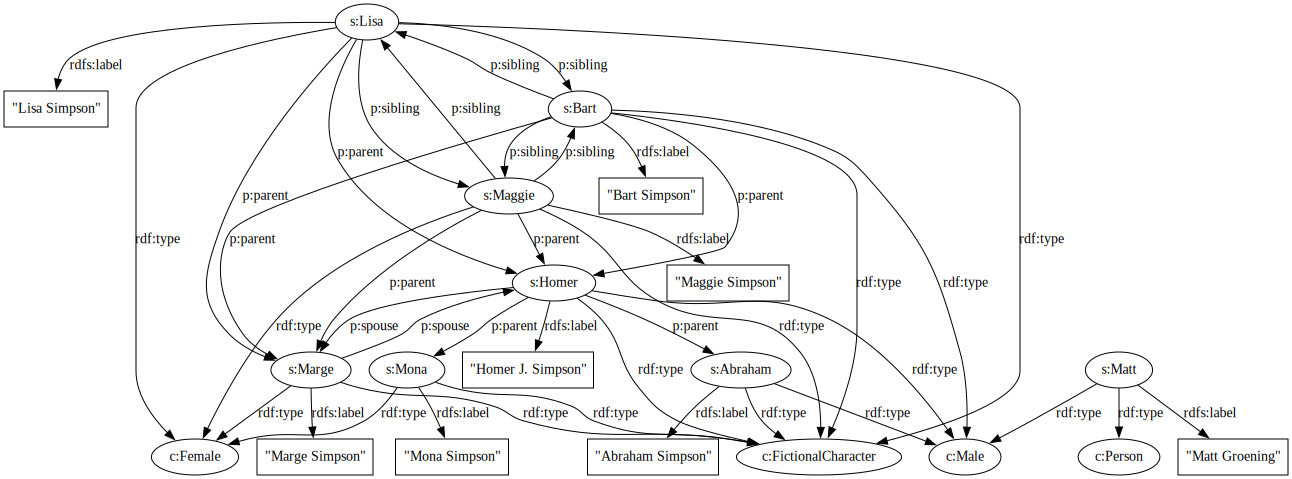

In [4]:
%%rdf turtle -l simpsons
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX s: <http://example.org/subjects#>
PREFIX p: <http://example.org/properties#>
PREFIX c: <http://example.org/classes#>

s:Homer a c:FictionalCharacter, c:Male ;
    p:spouse s:Marge ;
    p:parent s:Abraham ;
    p:parent s:Mona ;
    rdfs:label "Homer J. Simpson" .
s:Marge a c:FictionalCharacter, c:Female ;
    p:spouse s:Homer ;
    rdfs:label "Marge Simpson" .
s:Bart a c:FictionalCharacter, c:Male ;
    p:parent s:Homer ;
    p:parent s:Marge ;
    p:sibling s:Lisa ;
    p:sibling s:Maggie ;
    rdfs:label "Bart Simpson" .
s:Lisa a c:FictionalCharacter, c:Female ;
    p:parent s:Homer ;
    p:parent s:Marge ;
    p:sibling s:Bart ;
    p:sibling s:Maggie ;
    rdfs:label "Lisa Simpson" .
s:Maggie a c:FictionalCharacter, c:Female ;
    p:parent s:Homer ;
    p:parent s:Marge ;
    p:sibling s:Bart ;
    p:sibling s:Lisa ;
    rdfs:label "Maggie Simpson" .
s:Mona a c:FictionalCharacter, c:Female ;
    rdfs:label "Mona Simpson" .
s:Abraham a c:FictionalCharacter, c:Male ;
    rdfs:label "Abraham Simpson" .
s:Matt a c:Person, c:Male ;
    rdfs:label "Matt Groening" .

The Cell below will define some prefixes which can be used throughout the whole exercise notebook. You do not need to define them yourself and can just use them. You need to run the cell or you won't be able to use them.

In [5]:
%%rdf sparql --prefix
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX s: <http://example.org/subjects#>
PREFIX p: <http://example.org/properties#>
PREFIX c: <http://example.org/classes#>

SPARQL: Stored prefix.


## Task 1: Basic Queries [1.5 points]
Formulate the following questions as SPARQL queries using simple SELECT queries, variables and Basic Graph Patterns. You can use as many variables as you need but the answer to the question must be bound to the variable **?result**. For example, if the question is "What is the name of germany?", the solution would be:

**SELECT ?result  
WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;ex:Germany rdfs:label ?result  
}**

Please note the difference between a resource (an IRI) and the name of a resource (a human readable literal often assigned with the predicate *rdfs:label*). Read the question carefully and try to recognize whether we are asking for an entity (e.g. Who is xy?) or for the name of an entity (e.g. What is xy's name?).

**This task refers to [this graph](#Graph:-Simpsons) about a family called Simpsons. Assume a closed world (information that isn't explicitly stated is false).**

### 1a) [0.5 points]
Who are Homer Simpson's parents?

In [101]:
%%rdf sparql -l simpsons -s 1a
### YOUR SOLUTION HERE

SELECT ?result
WHERE {
    s:Homer p:parent ?result .

}


?result
http://example.org/subjects#Abraham
http://example.org/subjects#Mona


In [85]:
# This test checks whether your query gives the correct result. [0.5 points]
store = %rdf -r
assert '1a' in store['rdfresults'], err
var = Variable("result")
b = store['rdfresults']["1a"].bindings
lenCheck(b, 2)
exCheck(b, {var: uri(s,"Mona")})

### 1b) [0.5 points]
Whose mother is Marge Simpson? Hint: A query can result in multiple bindings

In [37]:
%%rdf sparql -l simpsons -s 1b
### YOUR SOLUTION HERE

SELECT ?result
WHERE {
    ?result p:parent s:Marge .
}

?result
http://example.org/subjects#Bart
http://example.org/subjects#Lisa
http://example.org/subjects#Maggie


In [38]:
# This test will check whether your query returns the right results. [0.5 points]
store = %rdf -r
assert '1b' in store['rdfresults'], err
var = Variable("result")
b = store['rdfresults']["1b"].bindings
exCheck(b, {var: uri(s, "Maggie")})

### 1c) [0.5 points]
How is Marge Simpson related to Homer Simpson? Hint: Variables can also be used at predicate positions.

In [39]:
%%rdf sparql -l simpsons -s 1c
### YOUR SOLUTION HERE

SELECT ?result
WHERE {
    s:Homer ?result s:Marge .
}

?result
http://example.org/properties#spouse


In [28]:
# This test will check whether your query returns the right results. [0.5 points]
store = %rdf -r
assert '1c' in store['rdfresults'], err
var = Variable("result")
b = store['rdfresults']["1c"].bindings
lenCheck(b, 1)

## Task 2: Constructing Queries [2 points]
Formulate the following questions as SPARQL queries. You can use as many variables as you need but the answer to the question must be bound to the variable **?result**. Again, please note that the URI/IRI of a resource is not the same as the literal name of that resource.

**This task refers to [this graph](#Graph:-Simpsons) about a family called Simpsons. Assume a closed world (information that isn't explicitly stated is false).**

### 2a) [0.5 points]
Who is called "Abraham Simpson"? Hint: Basic Graph Patterns can also match literals for equality.

In [29]:
%%rdf sparql -l simpsons -s 2a
### YOUR SOLUTION HERE
SELECT ?result
WHERE {
    ?result rdfs:label "Abraham Simpson" .
}

?result
http://example.org/subjects#Abraham


In [30]:
# This test will check whether your query returns the right results. [0.5 points]
store = %rdf -r
assert '2a' in store['rdfresults'], err
var = Variable("result")
b = store['rdfresults']["2a"].bindings
lenCheck(b, 1)

### 2b) [0.5 points]
What are the names of all fictional characters?

In [43]:
%%rdf sparql -l simpsons -s 2b
### YOUR SOLUTION HERE
SELECT ?result
WHERE {
    ?someone rdf:type c:FictionalCharacter .
    ?someone rdfs:label ?result .
}

?result
Homer J. Simpson
Bart Simpson
Abraham Simpson
Matt Groening


In [32]:
# This test will check whether your query returns the right results. [0.5 points]
store = %rdf -r
assert '2b' in store['rdfresults'], err
var = Variable("result")
b = store['rdfresults']['2b'].bindings
exCheck(b, {var: Literal("Marge Simpson")})
exCheck(b, {var: Literal("Lisa Simpson")})

### 2c) [1 point]
What are the names of all fathers?  
Do **not** use the DISTINCT keyword.  
Note: This query will yield the same binding for ?result multiple times. Think about why that is. If you can't think of a reason try projecting the other variables as well.

In [49]:
%%rdf sparql -l simpsons -s 2c
### YOUR SOLUTION HERE

SELECT ?result
WHERE {
    ?someone a c:FictionalCharacter .
    ?father a c:FictionalCharacter, c:Male .
    ?someone p:parent ?father .
    ?father rdfs:label ?result .
}


?result
Homer J. Simpson
Homer J. Simpson
Homer J. Simpson
Abraham Simpson


In [50]:
# This test will check whether your query returns the right results. [1 point]
store = %rdf -r
assert '2c', err
var = Variable("result")
b = store['rdfresults']['2c'].bindings
b = project(b, [var])
exCheck(b, {var: Literal("Abraham Simpson")})

## Solution Modifiers
SPARQL provides many ways to modify the result of a query. These are all applied after pattern matching and in the sequence that they are introduced here.

### ORDER BY

**SELECT ?employee WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;?employee a c:Employee .  
&nbsp;&nbsp;&nbsp;&nbsp;?employee p:income ?income  
}<br>
ORDER BY DESC(?income)**

The **ORDER BY** modifier can be used to sort the bindings by a specific variable. The example above sorts all employees descending by income. To sort ascending instead, either use **ASC** instead of **DESC** or just omit DESC as ASC is the default. When using no ORDER BY, the results are in no specific sequence and may vary from service to service.

### DISTINCT

**SELECT DISTINCT ?parent WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;?parent p:child ?child .  
}**

The **DISTINCT** modifier can be used to eliminate duplicate bindings. The example above shows all parents with at least one child but it shows all parents only once, even if they have multiple children. This could have been used in 2c). Note that DISTINCT only looks at projected variables.

### OFFSET

**SELECT ?employee WHERE {
&nbsp;&nbsp;&nbsp;&nbsp;?employee a c:Employee .  
}<br>
OFFSET 3**

The **OFFSET** modifier skips the first n>=0 results. The example above shows all employees but skips the first 3. OFFSET does nothing for n=0. OFFSET is often combined with ORDER BY and LIMIT to give predictable results (e.g. skip the 3 employees with the highest income).

### LIMIT

**SELECT ?employee WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;?employee a c:Employee .  
}<br>
LIMIT 3**

The **LIMIT** modifier specifies an upper bound n>=0 to the number of solutions returned. The example above shows only the first three employees. For n=0 no results will be returned. LIMIT is often combined with ORDER BY and LIMIT to give predictable results (e.g. only show the 3 employees with the highest income).

## Graph: Scientists
The following graph contains information about some well-known scientists.  
**You must run the following cell or the graph won't be in scope for following tasks.**

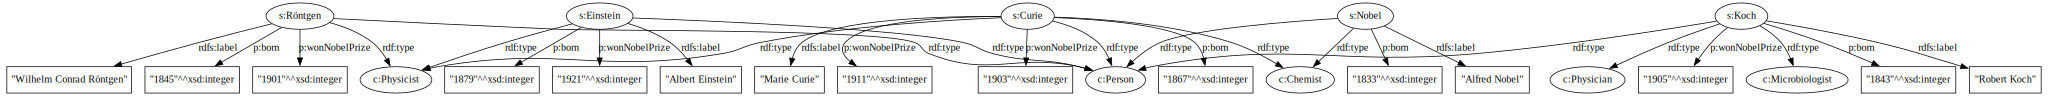

In [67]:
%%rdf turtle -l scientists
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX s: <http://example.org/subjects#>
PREFIX p: <http://example.org/properties#>
PREFIX c: <http://example.org/classes#>

s:Einstein a c:Person, c:Physicist ;
    p:born "1879"^^xsd:integer ;
    p:wonNobelPrize "1921"^^xsd:integer ;
    rdfs:label "Albert Einstein" .
s:Nobel a c:Person, c:Chemist ;
    p:born "1833"^^xsd:integer ;
    rdfs:label "Alfred Nobel" .
s:Curie a c:Person, c:Physicist, c:Chemist ;
    p:born "1867"^^xsd:integer ;
    p:wonNobelPrize "1903"^^xsd:integer ;
    p:wonNobelPrize "1911"^^xsd:integer ;
    rdfs:label "Marie Curie" .
s:Koch a c:Person, c:Physician, c:Microbiologist ;
    p:born "1843"^^xsd:integer ;
    p:wonNobelPrize "1905"^^xsd:integer ;
    rdfs:label "Robert Koch" .
s:Röntgen a c:Person, c:Physicist ;
    p:born "1845"^^xsd:integer ;
    p:wonNobelPrize "1901"^^xsd:integer ;
    rdfs:label "Wilhelm Conrad Röntgen" .

## Task 3: Modifying Solutions [2.5 points]
Use the above keywords to obtain the desired information with SPARQL queries.

**This task refers to [this graph](#Graph:-Scientists) about scientists. Assume a closed world (information that isn't explicitly stated is false).**

### 3a) [0.5 points]
The names of all persons that have won a nobel prize, ordered alphabetically without duplicates.
Use variable **?name** for the name.

In [80]:
%%rdf sparql -l scientists -s 3a
### YOUR SOLUTION HERE
SELECT DISTINCT ?name
WHERE{
    ?someone a c:Person .
    ?someone p:wonNobelPrize ?year .
    ?someone rdfs:label ?name .
}
ORDER BY ASC(?name)



?name
Albert Einstein
Marie Curie
Robert Koch
Wilhelm Conrad Röntgen


In [81]:
# This test will check whether your query returns the right results. [0.5 points]
store = %rdf -r
assert '3a' in store['rdfresults'], err
name = Variable("name")
b = store['rdfresults']["3a"].bindings
b = project(b, [name])
bindCheck(b, 0, {name: Literal("Albert Einstein")})
bindCheck(b, 2, {name: Literal("Robert Koch")})

### 3b) [1 point]
The second, third and fourth nobel prize sorted ascending by year with their respective owner's name.
Use variable **?year** for the year and **?name** for the name.

In [91]:
%%rdf sparql -l scientists -s 3b
### YOUR SOLUTION HERE

SELECT ?name ?year
WHERE{
    ?someone a c:Person .
    ?someone p:wonNobelPrize ?year .
    ?someone rdfs:label ?name .
}
ORDER BY ASC(?year)
OFFSET 1


?name,?year
Marie Curie,1903
Robert Koch,1905
Marie Curie,1911
Albert Einstein,1921


In [ ]:
# This test will check whether your query returns the right results. [1 point]

### 3c) [1 point]
The name and birth year of the owner of the last nobel prize. Use variable **?name** for the name and **?year** for the birth year.

In [94]:
%%rdf sparql -l scientists -s 3c
### YOUR SOLUTION HERE
SELECT ?name ?year
WHERE {
    ?someone a c:Person .
    ?someone p:wonNobelPrize ?nobelYear .
    ?someone p:born ?year .
    ?someone rdfs:label ?name .
}
ORDER BY DESC(?nobelYear)
LIMIT 1


?name,?year
Albert Einstein,1879


In [ ]:
# This test will check whether your query returns the right results. [1 point]

## Group Graph Patterns
Basic Graph Patterns are intuitive but have limited expressiveness. Group Graph Patterns allow us to group Basic Graph Patterns and then perform operations with these groups. A Group Graph Pattern is delimited with braces ({}) and inside the same syntax as with Basic Graph Patterns is used.

### Optional Values
Sometimes data is incomplete but we still want to query it (i.e. do a left join with the incomplete data). We want to query all employees but some have not provided a telephone number. We can do it like this:

**SELECT ?employee ?number WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;?employee a c:Employee .  
&nbsp;&nbsp;&nbsp;&nbsp;OPTIONAL { ?employee p:telephoneNumber ?number . }  
}**

The **OPTIONAL** keyword uses a Group Graph Pattern to allow for optional matching. When the optional Group Graph Pattern could not be matched, the resulting variable binding will be empty but all variables outside of the optional pattern will still be bound.

### Unions
Basic Graph Patterns are always conjunctive, meaning that all triples must be matched. With Group Graph Patterns, we can define two patterns and then unify their resulting variable bindings (i.e. create a disjunction). If we want to get all telephone numbers and e-mail addresses of all employees we could do it like this:

**SELECT ?employee ?contact WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;?employee a c:Employee .  
&nbsp;&nbsp;&nbsp;&nbsp;{ ?employee p:telephoneNumber ?contact . }  
&nbsp;&nbsp;&nbsp;&nbsp;UNION  
&nbsp;&nbsp;&nbsp;&nbsp;{ ?employee p:email ?contact . }  
}**

Here we define two Group Graph Patterns, one for telephone numbers  and one for e-mail addresses and then join their results.

## Task 4: Complex Queries [3 points]
Use Group Graph Patterns to obtain the desired information with SPARQL queries.

**This task refers to [this graph](#Graph:-Scientists) about scientists. Assume a closed world (information that isn't explicitly stated is false).**

### 4a) [1.5 points]
The names of all chemists and the year in which they have won a nobel prize. If they have won no nobel prize the year should be an empty value (None). Use variables **?name** for the name and **?year** for the nobel prize year. Multiple entries for the same chemist are allowed.

In [97]:
%%rdf sparql -l scientists -s 4a
### YOUR SOLUTION HERE
SELECT ?name ?year
WHERE{
    ?someone a c:Person,c:Chemist .
    ?someone rdfs:label ?name .
    OPTIONAL{?someone p:wonNobelPrize ?year} .
}

?name,?year
Alfred Nobel,None
Marie Curie,1903
Marie Curie,1911


In [ ]:
# This test will check whether your query returns the right results. [1.5 points]

### 4b) [1.5 points]
The names of all physicists as well as the names of all physicians ordered alphabetically. Use variable **?name** for the name.

In [103]:
%%rdf sparql -l scientists -s 4b
### YOUR SOLUTION HERE
SELECT ?name
WHERE {
    ?someone a c:Person, c:Physicist .
    ?someone rdfs:label ?name .
}
ORDER BY ASC(?name)

?name
Albert Einstein
Marie Curie
Wilhelm Conrad Röntgen


In [ ]:
# This test will check whether your query returns the right results. [1.5 points]

## Filters, Functions, Modifiers and Aggregates
With Group Graph Patterns and Solution Modifiers we can efficiently query RDF graphs but what if we actually want to do something with the data like calculating an average, filtering specific values or binding our own values? There are many ways to do this and we will introduce the most important ones.

### Filters
One can filter values inside a Group Graph Pattern by using the **FILTER** function. Inside the parantheses of the filter function we have to provide a filter expression. A Filter expression uses operators like \<, =, \> \<=, \>= and != to compare variables and literals with specific datatypes. We can also use arithmetic operators like +, -, \* and /. We can also combine multiple filter expressions with AND (&&), OR (||) and NOT (!). Filters are always applied to the whole Group Pattern in which they reside. There are also many functions which can be used in filter expressions like **contains** which checks if a string contains another string or **str** which converts a literal to its literal value (without datatype) or **regex** which matches a string with a full regular expression. Example:

**SELECT \* WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;?employee a c:Employee ;  
&nbsp;&nbsp;&nbsp;&nbsp;?employee rdfs:label ?name ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;p:income ?income .  
&nbsp;&nbsp;&nbsp;&nbsp;FILTER (str(?name) != "Angela" && contains(?name, "la") && ?income > 450)  
}**

Here we show all employees with their name and income who have an income larger than 450, aren't called "Angela" and whose name contains "la".

### Aggregates
To calculate values over multiple results, we need to use aggregate functions. The most important aggregate functions are min, max, avg, sum and count. These can simply be used in the projection. Aggregate functions always work on groups of results and compute separately for each group. By default all results are one big group but you can use the **GROUP BY** modifier to specify a variable to group by. For example if you want to know for all employers what the average income of their employees is, you could do it like this:

**SELECT ?employer (sum(?income) AS ?incomeSum) WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;?employer a c:Employer .  
&nbsp;&nbsp;&nbsp;&nbsp;?employee a c:Employee ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;p:worksFor ?employer ;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;p:income ?income .   
}
GROUP BY ?employer**

Please note that it is obligatory to bind the result with the **AS** keyword and surround the expression with parentheses. You can also use other functions and arithmetic operators on the left side of the AS, for example to remove a 10% tax you could do **(sum(?income)*0.9 AS ?incomeSum)** instead.

### Manual Binding
One can also bind their own values to variables using the BIND keyword. If you want to get the difference in population of Germany and Sweden:

**SELECT ?diff WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;s:Germany p:population ?x .  
&nbsp;&nbsp;&nbsp;&nbsp;s:Sweden p:population ?y .  
&nbsp;&nbsp;&nbsp;&nbsp;BIND (abs(?x - ?y) AS ?diff)  
}**

Again, you can use all kinds of expressions on the left side of the AS keyword.

### Graph: Movies
This graph contains information about some of the highest grossing films.  
**You must run the following cell or the graph won't be in scope for following tasks.**

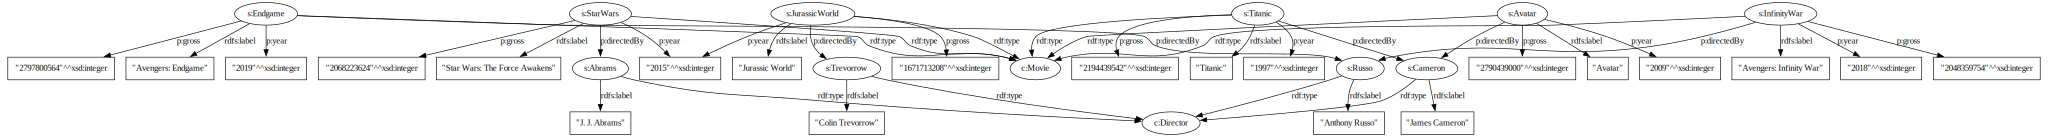

In [104]:
%%rdf turtle -l movies
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX s: <http://example.org/subjects#>
PREFIX p: <http://example.org/properties#>
PREFIX c: <http://example.org/classes#>
s:Titanic a c:Movie ;
    p:year "1997"^^xsd:integer ;
    p:gross "2194439542"^^xsd:integer ;
    p:directedBy s:Cameron ;
    rdfs:label "Titanic" .
s:StarWars a c:Movie ;
    p:year "2015"^^xsd:integer ;
    p:gross "2068223624"^^xsd:integer ;
    p:directedBy s:Abrams ;
    rdfs:label "Star Wars: The Force Awakens" .
s:JurassicWorld a c:Movie ;
    p:year "2015"^^xsd:integer ;
    p:gross "1671713208"^^xsd:integer ;
    p:directedBy s:Trevorrow ;
    rdfs:label "Jurassic World" .
s:Endgame a c:Movie ;
    p:year "2019"^^xsd:integer ;
    p:gross "2797800564"^^xsd:integer ;
    p:directedBy s:Russo ;
    rdfs:label "Avengers: Endgame" .
s:InfinityWar a c:Movie ;
    p:year "2018"^^xsd:integer ;
    p:gross "2048359754"^^xsd:integer ;
    p:directedBy s:Russo ;
    rdfs:label "Avengers: Infinity War" .
s:Avatar a c:Movie ;
    p:year "2009"^^xsd:integer ;
    p:gross "2790439000"^^xsd:integer ;
    p:directedBy s:Cameron ;
    rdfs:label "Avatar" .

s:Russo a c:Director ;
    rdfs:label "Anthony Russo" .
s:Cameron a c:Director ;
    rdfs:label "James Cameron" .
s:Abrams a c:Director ;
    rdfs:label "J. J. Abrams" .
s:Trevorrow a c:Director ;
    rdfs:label "Colin Trevorrow" .

## TASK 5: The Movies [5 points]
Use everything you have learned to obtain the desired information with SPARQL queries.

**This task refers to [this graph](#Graph:-Movies) about movies. Assume a closed world (information that isn't explicitly stated is false).**

### 5a) [1.5 points]
The name of all directors together with the sum of gross incomes of all their movies. Sort the results descending by the sum of gross incomes. Use variables **?name** for the director's name and **?grossSum** for the sum of all gross incomes.

In [109]:
%%rdf sparql -l movies -s 5a
### YOUR SOLUTION HERE
SELECT ?name (sum(?gross) AS ?grossSum)
WHERE{
    ?movie a c:Movie .
    ?movie p:gross ?gross .
    ?movie p:directedBy ?director .
    ?director rdfs:label ?name .
}
GROUP BY ?name
ORDER BY DESC(?grossSum)

?name,?grossSum
James Cameron,4984878542
Anthony Russo,4846160318
J. J. Abrams,2068223624
Colin Trevorrow,1671713208


In [ ]:
# This test will check whether your query returns the right results. [1.5 points]

### 5b) [1.5 points]
The name of all movies and their release year that were released after 2010. Sort the result ascending by the release date. Use variables **?name** for the movie's name and **?year** for the release year. **Use the FILTER function.**

In [111]:
%%rdf sparql -l movies -s 5b
### YOUR SOLUTION HERE
SELECT ?name ?year
WHERE {
    ?movie a c:Movie .
    ?movie p:year ?year .
    ?movie rdfs:label ?name .
    FILTER(?year > 2010)
}ORDER BY ASC(?year)

?name,?year
Star Wars: The Force Awakens,2015
Jurassic World,2015
Avengers: Infinity War,2018
Avengers: Endgame,2019


In [ ]:
# This test will check whether your query returns the right results. [1.5 points]

### 5c) [2 points]
The names of all movies before 2005 and the names of all movies after 2016 together with a string that either says "before 2005" or "after 2016" based on the release date. Sort the result ascending by the release date. Use variables **?name** for the movie's name and **?when** for the string.  
Hint: Use manual bindings.

In [125]:
%%rdf sparql -l movies -s 5c
### YOUR SOLUTION HERE
SELECT ?name ?when
WHERE{
    ?movie a c:Movie .
    
    
    
    {?movie rdfs:label ?name .
         ?movie p:year ?year .
    BIND("before 2006"  AS ?when) .
    FILTER(?year < 2005) . 
    }
    UNION
    {
        ?movie rdfs:label ?name .
         ?movie p:year ?year .
    BIND("after 2016"  AS ?when) .
    FILTER(?year > 2016) . 
    }
}

?name,?when
Titanic,before 2006
Avengers: Endgame,after 2016
Avengers: Infinity War,after 2016


In [ ]:
# This test will check whether your query returns the right results. [2 points]